In [2]:
import pandas as pd
import matplotlib.pyplot as plt 


# Binary

In [3]:
df=pd.read_csv("insurance_data.csv")
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


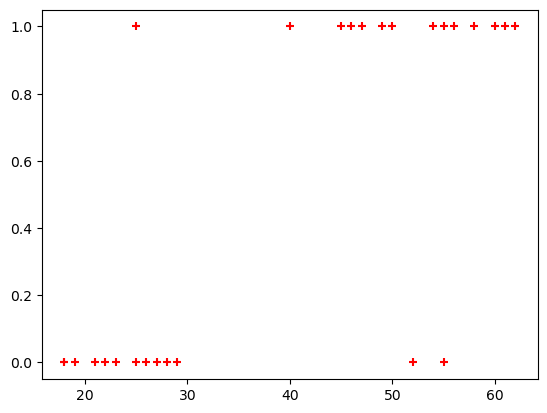

In [4]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [5]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(df[["age"]], df.bought_insurance, test_size=0.1)
# random_state=1 (add random to keep the model)

In [26]:
X_test

,age
17,58
14,49
18,19


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model= LogisticRegression()

In [17]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
model.predict(X_test)

array([1, 1, 1])

In [19]:
model.score(X_test, y_test)

0.6666666666666666

In [22]:
model.predict_proba(X_test) # Get the probability to buy or not for the test_set

array([[0.05319278, 0.94680722],
       [0.13050536, 0.86949464],
       [0.19699851, 0.80300149]])

In [30]:
model.predict([[15]])

C:\Users\loic\miniforge3\envs\ML\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Multiclass Classification


# Multiclass classification

In [33]:
from sklearn.datasets import load_digits

In [41]:
digits= load_digits()

In [42]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

<Figure size 640x480 with 0 Axes>

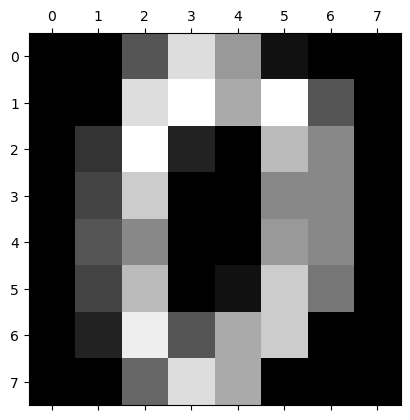

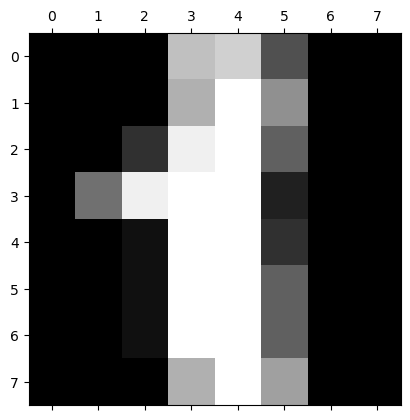

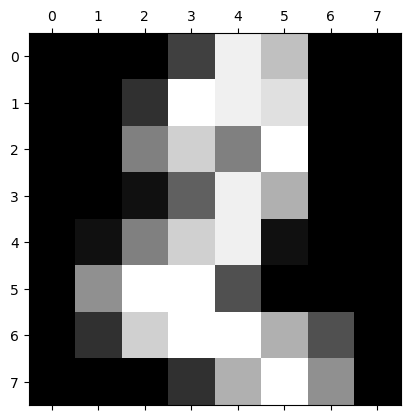

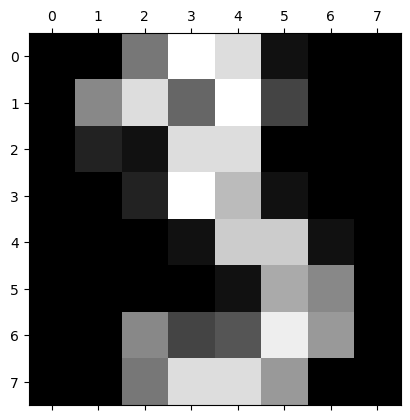

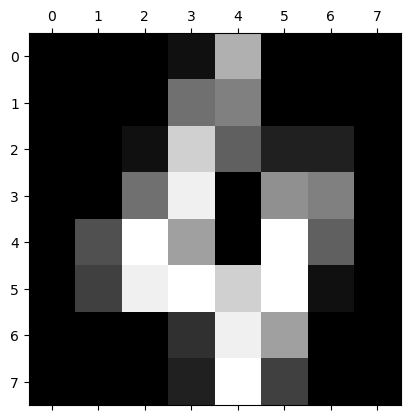

In [39]:
plt.gray()
for i in range(5):
  
    plt.matshow(digits.images[i]) # data has pixel and images the images 

In [40]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [70]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, test_size=0.2)

In [124]:
len(X_train), len(X_test)

(1437, 360)

In [125]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [126]:
model.fit(X_test, y_test)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [127]:
model.score(X_test, y_test)

1.0

np.int64(6)

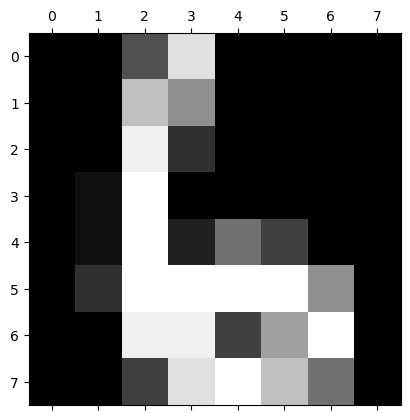

In [128]:
plt.matshow(digits.images[67])
digits.target[67]

In [129]:
model.predict([digits.data[67]])

array([6])

In [130]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [131]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [132]:
cm= confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]])

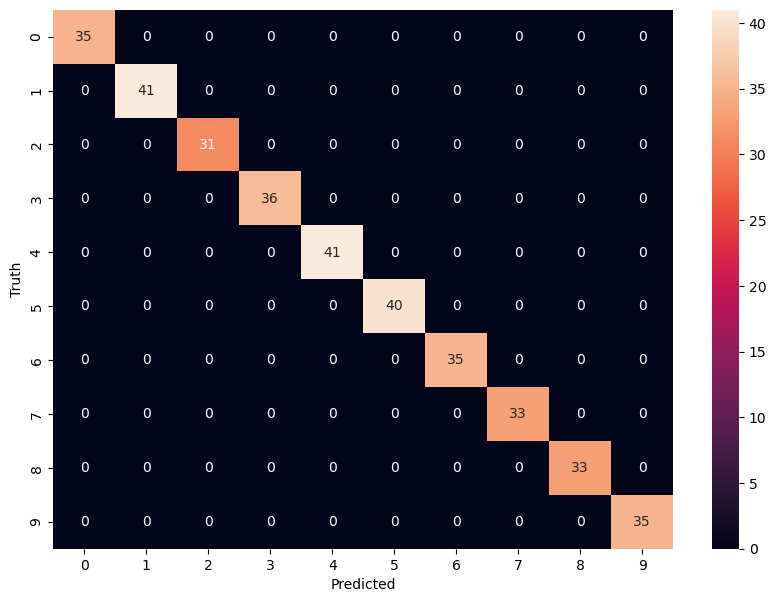

In [133]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()